###### json 파일 읽기 실습 



In [1]:
import json 

# json 파일의 경로를 하나 가져와 열어보겠습니다.
json_path = "./json_annotation/instances_default.json"

with open(json_path, 'r', encoding='utf-8') as j : 
    json_data = json.load(j)
    
print(f"json type : {type(json_data)}")
print("json_data : ", json_data )

json type : <class 'dict'>
json_data :  {'licenses': [{'name': '', 'id': 0, 'url': ''}], 'info': {'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}, 'categories': [{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}], 'images': [{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}], 'annotations': [{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]}


In [2]:
print(json_data['categories'])

[{'id': 1, 'name': 'cat', 'supercategory': ''}, {'id': 2, 'name': 'dog', 'supercategory': ''}]


In [5]:
print(json_data['images'])

[{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}]


In [7]:
print(json_data['annotations'])

[{'id': 1, 'image_id': 1, 'category_id': 2, 'segmentation': [], 'area': 42499.856999999996, 'bbox': [468.94, 92.01, 171.06, 248.45], 'iscrowd': 0, 'attributes': {'occluded': False}}, {'id': 2, 'image_id': 1, 'category_id': 1, 'segmentation': [], 'area': 42994.3464, 'bbox': [3.96, 183.38, 200.88, 214.03], 'iscrowd': 0, 'attributes': {'occluded': False}}]


##### 위의 정보를 이용하여 이미지 시각화 실습

{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
./json_image/01.jpg
bbox 좌표 >>  468 92 171 248
dog
bbox 좌표 >>  3 183 200 214
cat


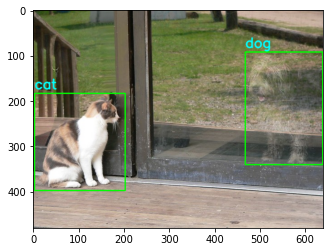

In [24]:
import json 
import os
import cv2
import matplotlib.pylab as plt

# json_path 경로 지정 
json_path = "./json_annotation/instances_default.json"

# json 읽기
with open(json_path, 'r', encoding='utf-8') as j : 
    json_data = json.load(j)
    
category_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

# 라벨 딕셔너리 선언 
label_dict = {1: "cat", 2:"dog"}

for image_json in images_info : 
    print(image_json)
    file_name = image_json['file_name']
    image_path = os.path.join("./json_image/", file_name)
    image_id = image_json['id']
    print(image_path)
    
    # image read 
    image = cv2.imread(image_path)
    # iamge BGR -> RGB 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # bbox info 
    for anno_json in annotations_info : 
        if image_id == anno_json['image_id'] :
            bbox = anno_json['bbox']
            # 좌표 변수에 박스 좌표 저장 (int 형 변환 이유 : cv2.rectangle 좌표 값은 int 형태만 가능)
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            # 박스 좌표 확인 
            print("bbox 좌표 >> " , x, y, w, h)
            
            # 박스 그리기 
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0),2)
            
            # 라벨 표시 
            category_id = anno_json['category_id']
            label_name = label_dict[category_id]
            print(label_name)
            image = cv2.putText(image, label_name, (x, y-10), 
                  cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)
            
            
    plt.imshow(image)
    plt.show()

#### json format -> yolo format 으로 변경하고 텍스트 파일로 저장하기 

In [28]:
import json 
import os
import cv2
import matplotlib.pylab as plt

# json_path 경로 지정 
json_path = "./json_annotation/instances_default.json"

# json 읽기
with open(json_path, 'r', encoding='utf-8') as j : 
    json_data = json.load(j)
    
category_info = json_data['categories']
images_info = json_data['images']
annotations_info = json_data['annotations']

# 라벨 딕셔너리 선언 
# 0 -> cat , 1 -> dog
label_dict = {1: 0, 2: 1}

for image_json in images_info : 
    print(image_json)
    file_name = image_json['file_name']
    image_path = os.path.join("./json_image/", file_name)
    image_id = image_json['id']
    print(image_path)
    print("file name ", file_name)
    
    # image read 
    image = cv2.imread(image_path)
    # iamge BGR -> RGB 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # image size 
    img_height, img_width, img_channel = image.shape
    
    # bbox info 
    for anno_json in annotations_info : 
        if image_id == anno_json['image_id'] :
            bbox = anno_json['bbox']
            # 좌표 변수에 박스 좌표 저장 (int 형 변환 이유 : cv2.rectangle 좌표 값은 int 형태만 가능)
            x = int(bbox[0])
            y = int(bbox[1])
            w = int(bbox[2])
            h = int(bbox[3])
            
            # 박스 그리기 
            cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0),2)
            
            # 라벨 표시 
            category_id = anno_json['category_id']
            label_number = label_dict[category_id]
            
            # xywh -> center_x, center_y, w, h 변경 하기 
            center_x = ((2*x + w)/(2*img_width))
            center_y = ((2*y + h)/(2*img_height))
            yolo_w = w/img_width
            yolo_h = h/img_height
            
            print("yolo 좌표 변경 값 >> ",label_number,center_x, center_y, yolo_w, yolo_h)
            # 이미지 명과 라벨 파일 명이 동일해야합니다. 
            # 위에 file_name 경우는 01.jpg 우리가 필요한것은 01 이라는 이름 입니다. 
            #file_name_tmep = os.path.splitext(file_name)[0]
            file_name_temp = file_name.replace(".jpg", "")
            
            # 텍스트 파일 쓰기 
        with open(f"{file_name_temp}.txt", "a") as f:
            f.write(f"{label_number} {center_x} {center_y} {yolo_w} {yolo_h} \n")
            

{'id': 1, 'width': 640, 'height': 480, 'file_name': '01.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
./json_image/01.jpg
file name  01.jpg
yolo 좌표 변경 값 >>  1 0.86484375 0.45 0.2671875 0.5166666666666667
yolo 좌표 변경 값 >>  0 0.1609375 0.6041666666666666 0.3125 0.44583333333333336
